In [2]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [3]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024November')

In [4]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_13544\1807247568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfilt.duration[allfilt.duration==0] += 0.001
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_13544\1807247568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfilt.duration[allfilt.duration==0] += 0.001


Text(0.5, 1.0, 'Huddle duration, males')

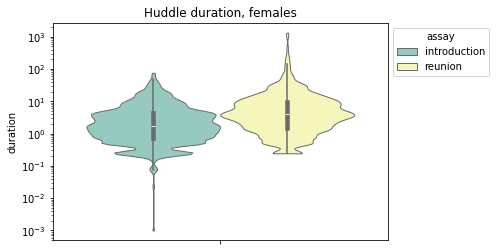

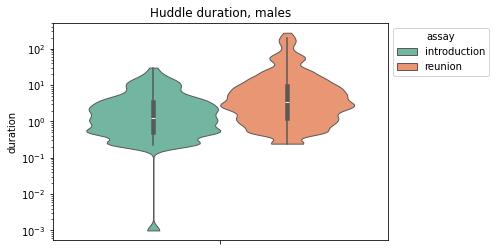

In [34]:
# ----- COMPARE HUDDLE LENGTH POPULATIONS FROM INTRO AND REUNION -----

sexes = ['F','M']
GT = 'WT'
assays=['introduction','reunion']
behavior = 'Huddle'
usestat = 'duration'

allfilt = data.loc[(data['sex'].isin(sexes)) & (data['assay'].isin(assays)) & (data['behavior']==behavior) & (data['GT']==GT)]

allfilt.duration[allfilt.duration==0] += 0.001

# females
f = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='F'], y=usestat, bw_adjust=0.5, cut=0, linewidth=1, palette='Set3',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, females')

g = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='M'], y='duration', bw_adjust=0.5, cut=0, linewidth=1, palette='Set2',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, males')

Text(0.5, 1.0, 'Median huddle duration, males')

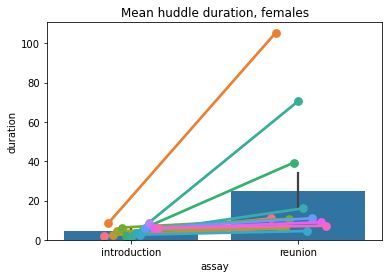

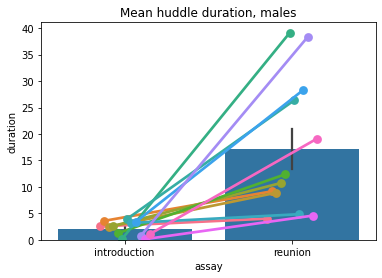

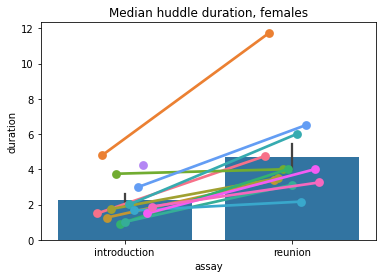

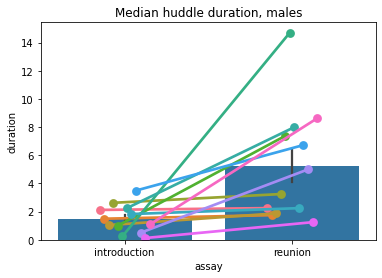

In [63]:
# ----- CALCULATE MEAN DURATION PER INDIVIDUAL -----

allmeans = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].mean().reset_index()
allmeds = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].median().reset_index()

# plot female means
f = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, females')

# plot male means
g = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, males')

# plot female medians
h = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, females')

# plot male means
i = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, males')

In [27]:
# ----- PLOT DURATION DISTRIBUTIONS IN BAR HISTOGRAMS ------